In [1]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
# cramer v test
def cramers_V(var1, var2):
    crosstab = np.array(
        pd.crosstab(var1, var2, rownames=None, colnames=None)
    )  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = (
        min(crosstab.shape) - 1
    )  # Take the minimum value between the columns and the rows of the cross table
    return stat / (obs * mini)

# view max and min of a column and other stats
def desc(ds, colname):
    print(ds[colname].values[0:10])
    print(ds[colname].describe())


In [3]:
# load dataset
df = pd.read_csv('./data/london_clean_weather.csv')
len(df)

522

In [4]:
# compute chi square correlation, suitable for categorical values
# source: https://www.youtube.com/watch?v=_jdfjRzaHMM
tips_categorical = df[
    [
        'DateOfCall', 'CalYear', 'HourOfCall', 'IncidentGroup', 
        'PropertyType', 'PumpHoursRoundUp', 'NumPumpsAttending', 
        'Notional Cost (£)', 'PropertyCategory', 'cloud_cover','sunshine',
        'global_radiation','max_temp','mean_temp','min_temp','precipitation',
        'pressure','snow_depth'
    ]
]

rows = []

for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(
            tips_categorical[var1], tips_categorical[var2]
        )  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(
    cramers_results, columns=tips_categorical.columns, index=tips_categorical.columns
)


C:\Users\rhani\AppData\Local\Temp\ipykernel_23496\1267689172.py:11: RuntimeWarning: invalid value encountered in divide
  return stat / (obs * mini)
C:\Users\rhani\AppData\Local\Temp\ipykernel_23496\1267689172.py:11: RuntimeWarning: invalid value encountered in divide
  return stat / (obs * mini)
C:\Users\rhani\AppData\Local\Temp\ipykernel_23496\1267689172.py:11: RuntimeWarning: invalid value encountered in divide
  return stat / (obs * mini)
C:\Users\rhani\AppData\Local\Temp\ipykernel_23496\1267689172.py:11: RuntimeWarning: invalid value encountered in divide
  return stat / (obs * mini)
C:\Users\rhani\AppData\Local\Temp\ipykernel_23496\1267689172.py:11: RuntimeWarning: invalid value encountered in divide
  return stat / (obs * mini)
C:\Users\rhani\AppData\Local\Temp\ipykernel_23496\1267689172.py:11: RuntimeWarning: invalid value encountered in divide
  return stat / (obs * mini)
C:\Users\rhani\AppData\Local\Temp\ipykernel_23496\1267689172.py:11: RuntimeWarning: invalid value encounte

In [5]:
df2

,DateOfCall,CalYear,HourOfCall,IncidentGroup,PropertyType,PumpHoursRoundUp,NumPumpsAttending,Notional Cost (£),PropertyCategory,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
DateOfCall,1.00,0.70,0.55,0.02,0.28,0.02,0.01,0.44,0.04,0.82,1.00,1.00,1.00,1.00,1.00,0.50,1.00,NaN
CalYear,0.70,1.00,0.45,0.03,0.25,0.02,0.01,0.61,0.04,0.79,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN
HourOfCall,0.55,0.45,1.00,0.07,0.21,0.04,0.03,0.10,0.08,0.46,0.50,0.50,0.50,0.50,0.50,0.45,0.50,NaN
IncidentGroup,0.02,0.03,0.07,1.00,0.42,0.07,0.06,0.10,0.23,0.03,0.04,0.04,0.04,0.04,0.04,0.01,0.04,NaN
PropertyType,0.28,0.25,0.21,0.42,1.00,0.32,0.35,0.28,1.00,0.25,0.24,0.24,0.24,0.24,0.24,0.28,0.24,NaN
PumpHoursRoundUp,0.02,0.02,0.04,0.07,0.32,1.00,0.49,1.00,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02,NaN
NumPumpsAttending,0.01,0.01,0.03,0.06,0.35,0.49,1.00,0.54,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN
Notional Cost (£),0.44,0.61,0.10,0.10,0.28,1.00,0.54,1.00,0.06,0.42,0.39,0.39,0.39,0.39,0.39,1.00,0.39,NaN
PropertyCategory,0.04,0.04,0.08,0.23,1.00,0.02,0.02,0.06,1.00,0.04,0.06,0.06,0.06,0.06,0.06,0.05,0.06,NaN
cloud_cover,0.82,0.79,0.46,0.03,0.25,0.02,0.01,0.42,0.04,1.00,1.00,1.00,1.00,1.00,1.00,0.65,1.00,NaN


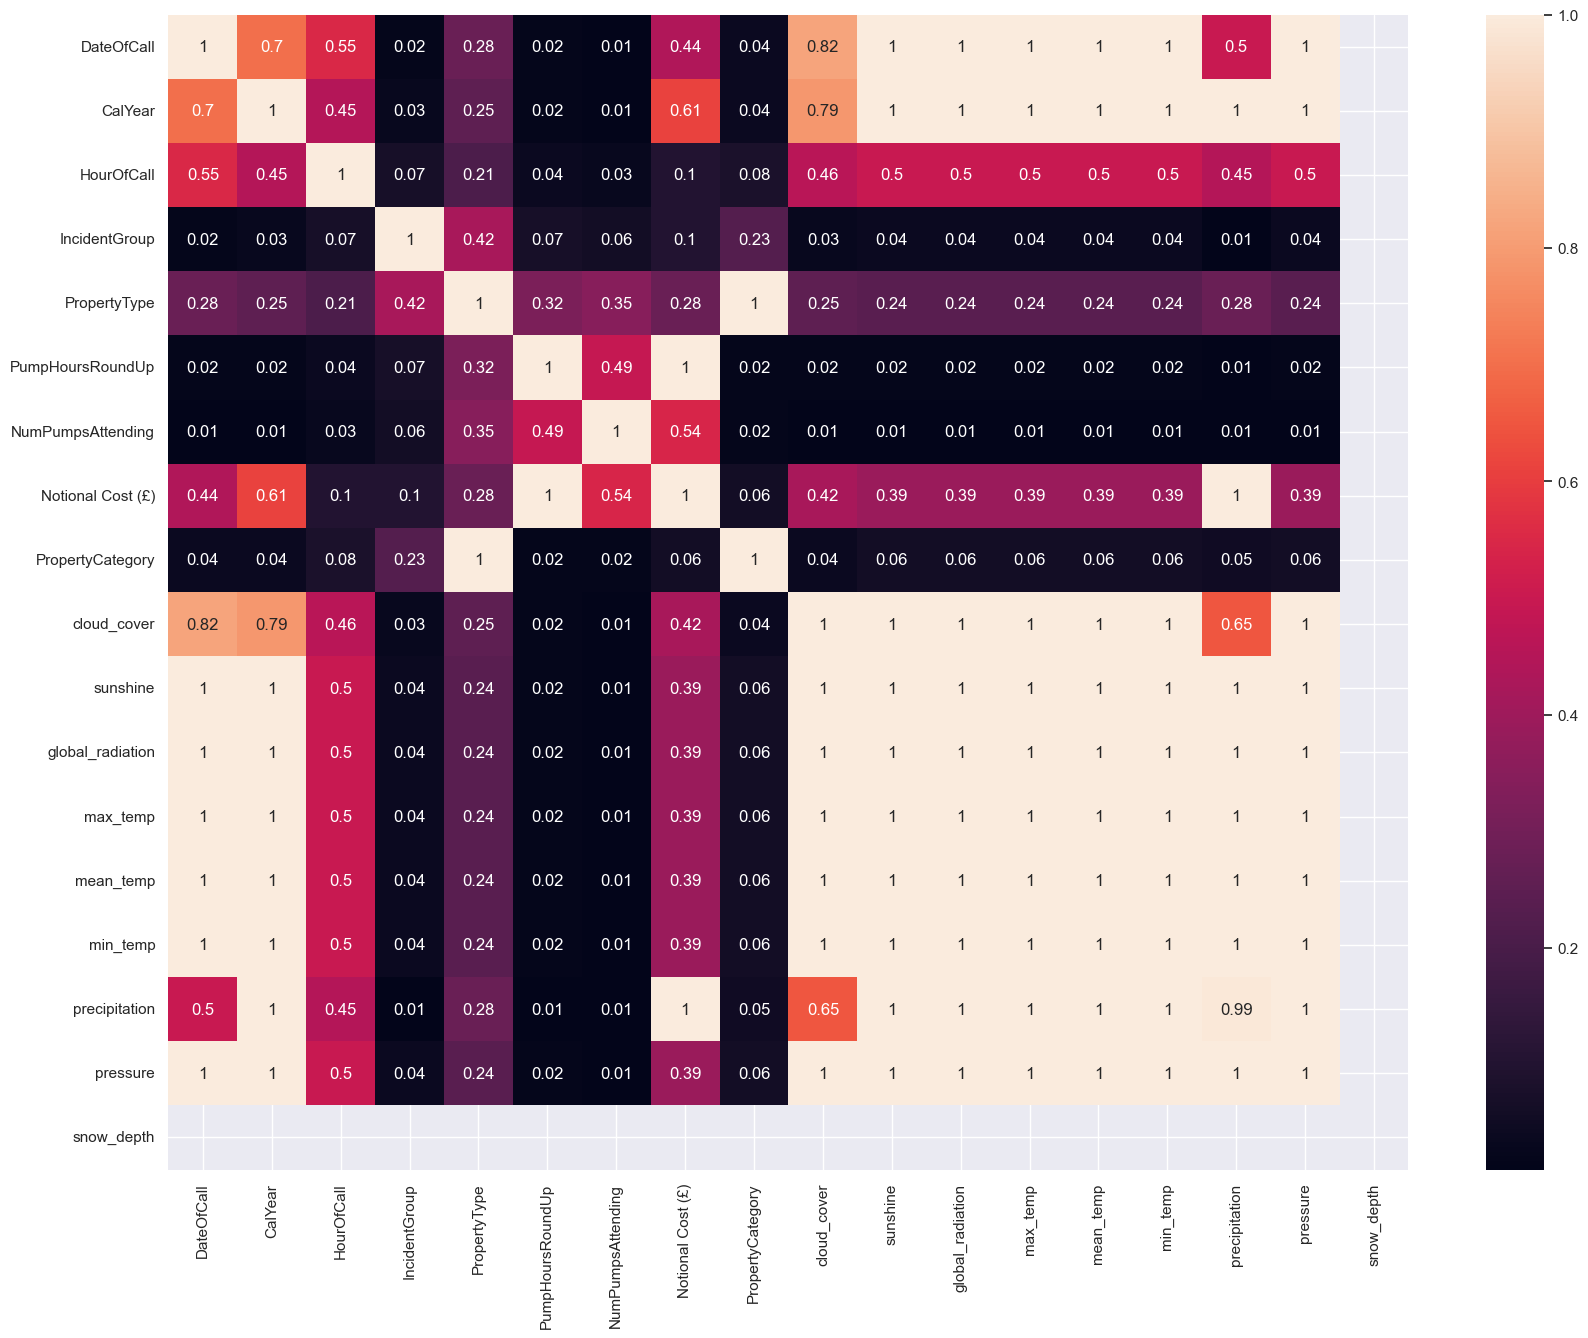

In [6]:
# plotting the heatmap
sns.set(rc={'figure.figsize':(20,15)})
hm = sns.heatmap(data=df2, annot=True)

# displaying the plotted heatmap
plt.show()